In [85]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(style="darkgrid")

In [86]:
class SplineTuple:
    def __init__(self, a, b, c, d, x):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.x = x

In [87]:
def BuildSpline(x, y, n):
    splines = [SplineTuple(0, 0, 0, 0, 0) for _ in range(0, n)]
    for i in range(0, n):
        splines[i].x = x[i]
        splines[i].a = y[i]
    
    splines[0].c = splines[n - 1].c = 0.0
    
    alpha = [0.0 for _ in range(0, n - 1)]
    beta  = [0.0 for _ in range(0, n - 1)]
 
    for i in range(1, n - 1):
        hi  = x[i] - x[i - 1]
        hi1 = x[i + 1] - x[i]
        A   = hi
        C   = 2.0 * (hi + hi1)
        B   = hi1
        F   = 6.0 * ((y[i + 1] - y[i]) / hi1 - (y[i] - y[i - 1]) / hi)
        z   = (A * alpha[i - 1] + C)
        alpha[i] = -B / z
        beta[i] = (F - A * beta[i - 1]) / z
        
    for i in range(n - 2, 0, -1):
        splines[i].c = alpha[i] * splines[i + 1].c + beta[i]
    
    for i in range(n - 1, 0, -1):
        hi = x[i] - x[i - 1]
        splines[i].d = (splines[i].c - splines[i - 1].c) / hi
        splines[i].b = hi * (2.0 * splines[i].c + splines[i - 1].c) / 6.0 + (y[i] - y[i - 1]) / hi
        
    return splines

In [88]:
def PrintGraph(x, y, spline):
    plt.figure(figsize = (20,8), dpi = 80)
    n = 100
    for i in range(1, len(x)):
        xt = np.linspace(x[i - 1], x[i], n)
        s = []
        for j in range(0, len(xt)):
            s.append((spline[i].a + spline[i].b * (xt[j] - x[i]) + spline[i].c / 2 * (xt[j] - x[i])**2 + spline[i].d / 6 * (xt[j] - x[i])**3))
        plt.plot(xt, s)
    plt.scatter(x, y)

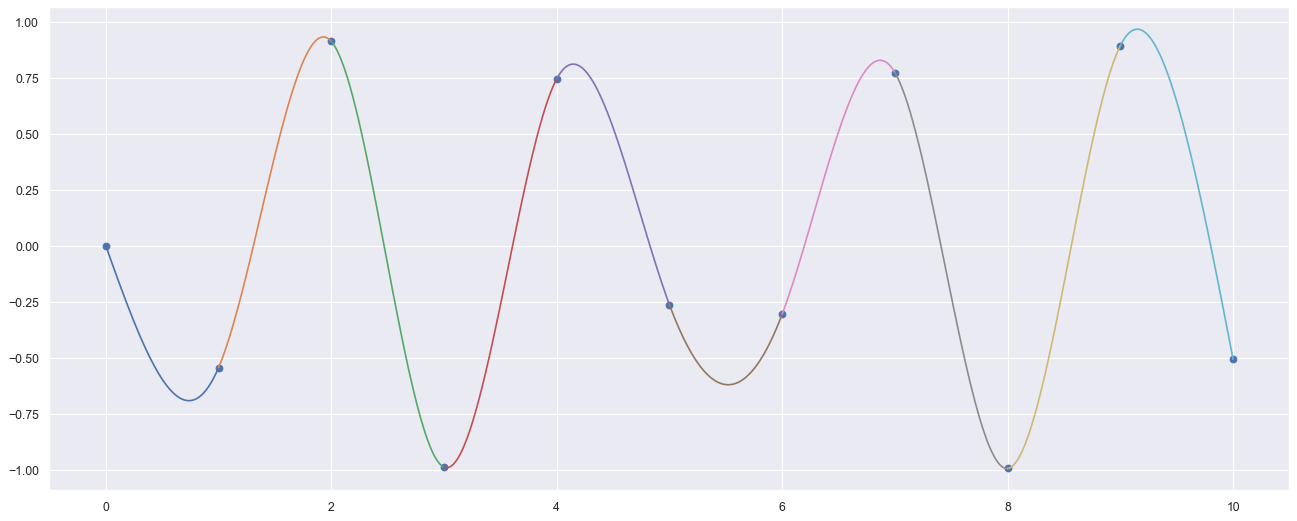

In [89]:
x = np.linspace(0, 10, 11)
y = np.sin(10 * x)
 
spline = BuildSpline(x, y, len(x))
PrintGraph(x, y, spline)